In [4]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/624.3 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 61.4/624.3 kB 825.8 kB/s eta 0:00:01
   ----- --------------------------------- 81.9/624.3 kB 573.4 kB/s eta 0:00:01
   --------- ---------------------------- 163.8/624.3 kB 893.0 kB/s eta 0:00:01
   --------- ---------------------------- 163.8/624.3 kB 893.0 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/624.3 kB 1.0 MB/s eta 0:00:01
   ----------------- ---------------------- 276.5/624.3 kB 1.0 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/624.3 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 419.8/624.3 kB 1.1 MB/s eta 0:00:01
   -------------------------- ----------- 440.3/624.3 kB 98

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Set visualization style
sns.set(style="whitegrid")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [8]:
# Load the dataset
data = pd.read_csv("blogs.csv")

In [10]:
# Display basic dataset info
print("Dataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [12]:
# Display first few rows
print("\nFirst 5 rows of dataset:")
display(data.head())


First 5 rows of dataset:


,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [14]:
# Function to clean text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize words
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(tokens)

# Apply text cleaning function to the 'Data' column
data['cleaned_text'] = data['Data'].apply(clean_text)

# Display cleaned text
data[['Data', 'cleaned_text']].head()


,Data,cleaned_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [15]:
# Convert text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000 for efficiency
X = vectorizer.fit_transform(data['cleaned_text'])  # Transform cleaned text
y = data['Labels']  # Target variable (categories)


In [17]:
# Splitting the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the number of training and testing samples
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 1600, Testing samples: 400


In [18]:
# Initialize and train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Model training completed
print("Naive Bayes model has been trained successfully!")


Naive Bayes model has been trained successfully!


Model Accuracy: 0.825

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med    

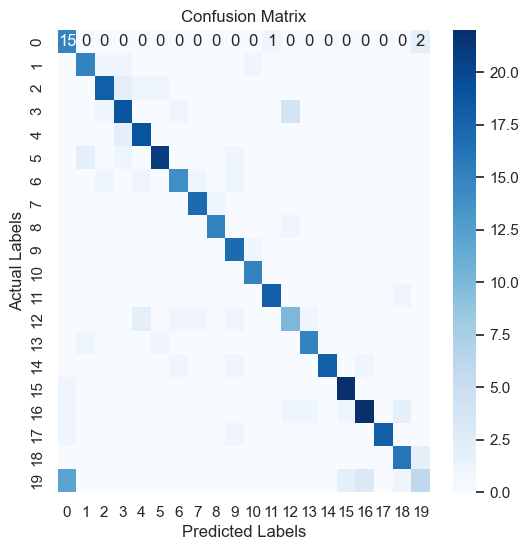

In [19]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Print evaluation metrics
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix visualization
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()


In [25]:
# Function to determine sentiment polarity
def get_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis on 'Data' column
data['Sentiment'] = data['Data'].apply(get_sentiment)

# Display first few results
data[['Data', 'Sentiment']].head()


,Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,Positive


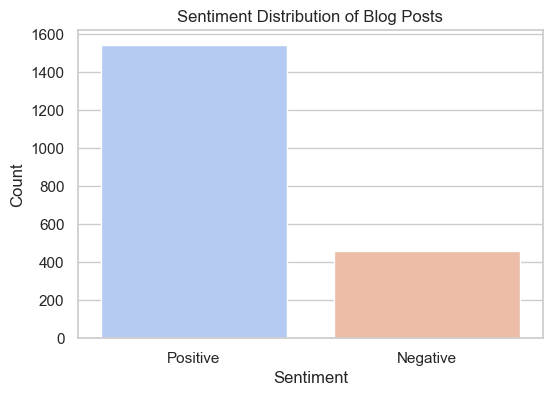

In [27]:
# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x=data['Sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution of Blog Posts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


,Data,Labels,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,Positive


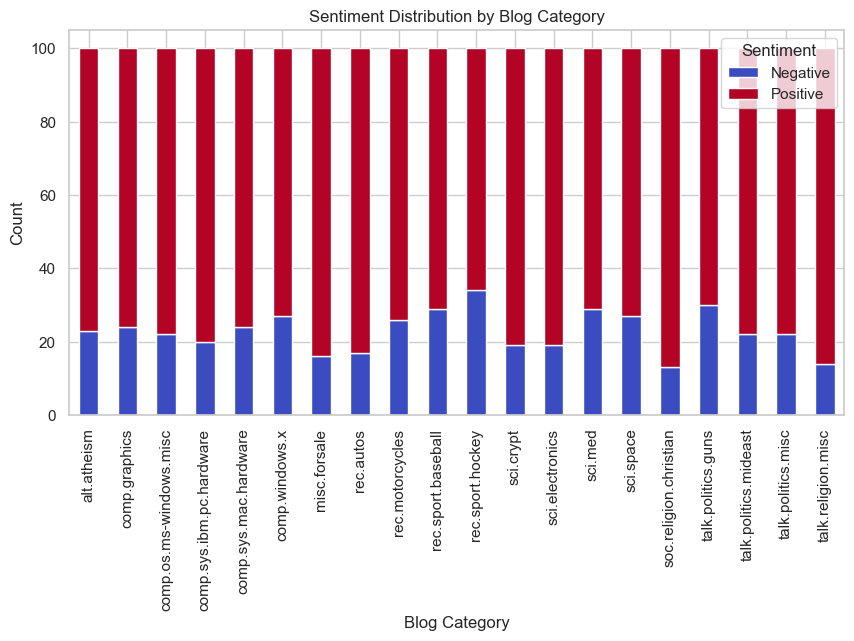

In [29]:
# Display first few rows of the dataset with sentiment analysis results
display(data[['Data', 'Labels', 'Sentiment']].head())

# Summarize sentiment distribution across different blog categories
sentiment_distribution = data.groupby('Labels')['Sentiment'].value_counts().unstack()
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10,5), colormap="coolwarm")
plt.title("Sentiment Distribution by Blog Category")
plt.xlabel("Blog Category")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()
